In [1]:
import numpy as np
from matplotlib import pyplot as plt 
from matplotlib import animation as am
from matplotlib import cm
from kuramoto import * # import the kuramoto classes from file 
from utils import *

## First, we do some 1D simulations.  

In [12]:
# Set up model parameters 
epsilon = 1
etas = [-1, -0.9, -0.8, -0.7, -0.6, -0.55, -0.5, -0.45, -0.4, -0.3, 0]
sigma = 0.45
mean_omega = 0


# Set up simulation parameters 
L = 160
T = 1e5 # total time of the simulation 
n_frames = 1e4 # number of time points recorded in the end 
grad = 1
grads = [-grad, grad]

In [13]:
data = [] 
omegas = [] 
models = [] 
seed = 100


for (i, eta) in enumerate(etas): 
    # Initialise the model and run the simulation 
    init = np.zeros(L)
    model = Kuramoto(epsilon, eta, sigma, mean_omega, BC='grad', grad=grads)
    model.initialise(L, T, n_frames, init=init, seed=None) 
    model.evolve() # this runs the simulation, set verbose to True to see output at every time step 
    
    phases = np.copy(model.res[-1]) % (2*np.pi)
    shift(phases)
    data.append(phases)
    omegas.append(model.omegas)
    models.append(model)

  9%|▉         | 920/10000 [00:23<03:50, 39.40it/s]


KeyboardInterrupt: 

In [5]:
np.save('data_inf_eta_sigma={}.npy'.format(sigma), data)

In [3]:
data = np.load('data_inf_eta_sigma={}.npy'.format(sigma))

slope:  0.6433130691607143
slope:  0.7189810218454807
slope:  0.6932653046238287
slope:  0.8007158736327543
slope:  0.7284553364956672
slope:  0.5875646304001879
slope:  0.627478486665245


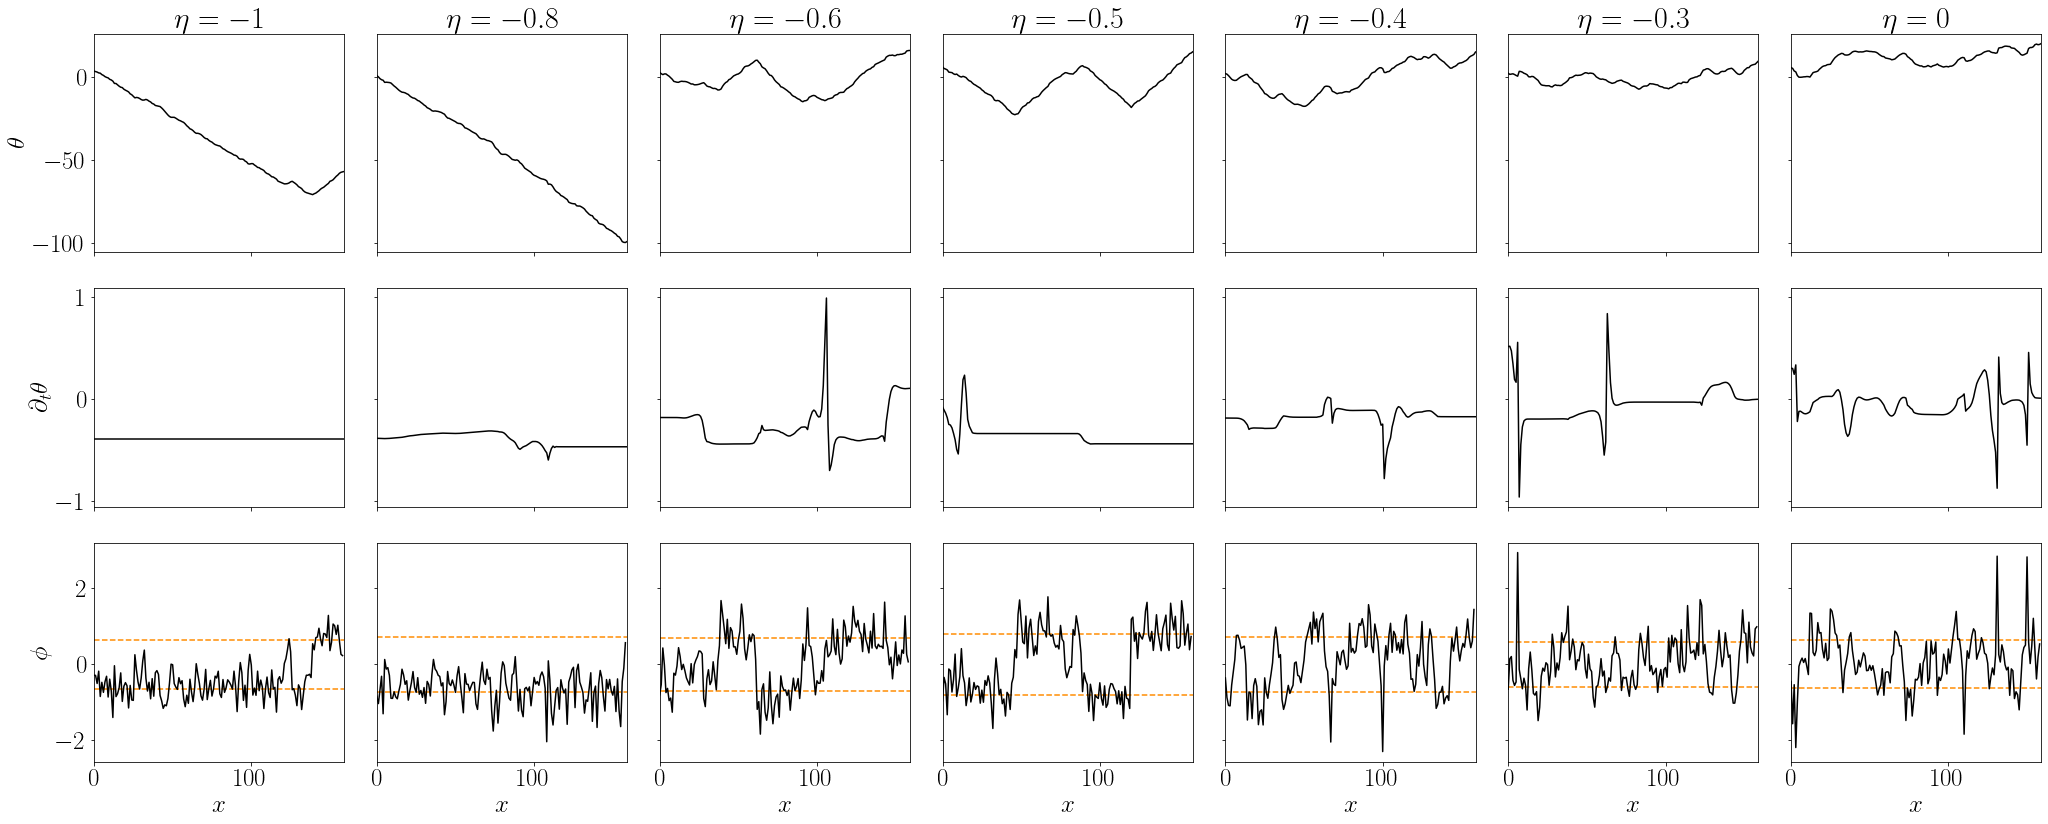

In [10]:
f = 10

plt.rc('text', usetex=True)
plt.rc('font', size=25, family='serif')
fig, axes = plt.subplots(3, len(etas[:f]), sharey='row', sharex=True, figsize=(4*len(etas[:f])+1, 12))

for (i, eta) in enumerate(etas[:f]):
    axes[0, i].plot(data[i], 'k-')    
    axes[1, i].plot(models[i]._det_rhs(data[i]), 'k-')
    
    v = data[i][1:]-data[i][:-1]
    s = np.sqrt(2*np.mean(1-np.cos(v)))
    axes[2, i].axhline(y=s, color='darkorange', linestyle='--')
    axes[2, i].axhline(y=-s, color='darkorange', linestyle='--')
    axes[2, i].plot(v, 'k-')
    axes[2, i].set_xlabel(r'$x$')
    print('slope: ', s)
    

axes[0, 0].set_ylabel(r'$\theta$')
axes[1, 0].set_ylabel(r'$\partial_t \theta $')
axes[2, 0].set_ylabel(r'$\phi$')
plt.xlim([0, L-1])

for i in range(len(etas)):
    axes[0, i].set_title(r'$\eta={}$'.format(etas[i]))
plt.savefig('sim.pdf')
plt.tight_layout()
plt.show() 

### Obtain the Brownian Bridges from $\phi = \partial_x \theta$ using the known value of eta 

In [5]:
phis = np.array([x[1:]-x[:-1] for x in data])
BBs_inf = [] 
dets = [] 

for (i, phi) in enumerate(phis): 
    BB, d = find_BB(phi, etas[i], grad)
    BBs_inf.append(BB)
    dets.append(d)

### Compare the Brownian Bridge inferred to the true Brownian Bridge (obtained directly from the $\omega$ distribution)

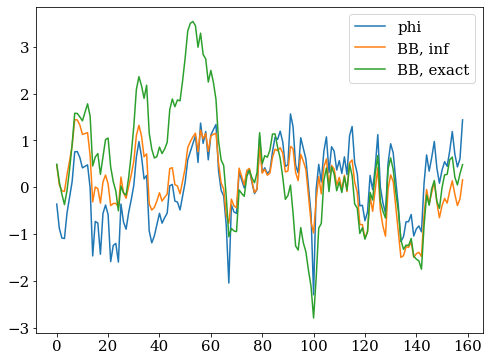

In [18]:
BBs_exact = np.array(exact_BB(omegas))

j = 4
plt.rc('font', size=15, family='serif')
plt.rc('text', usetex=False)

fig = plt.figure(figsize=(8, 6))
plt.plot(phis[j], label='phi')
plt.plot(BBs_inf[j], label='BB, inf')
plt.plot(BBs_exact[j], label='BB, exact')
plt.legend() 
plt.show() 

eta:  -0.8791631053976839 , error:  0.13238876075286382 0.18004871462389477
sigma:  0.4152912753475412 , error:  0.03293473906570471 0.046108634691986596
grad:  1.774692834735129 , error:  0.392983083111948 1.4011503235010478


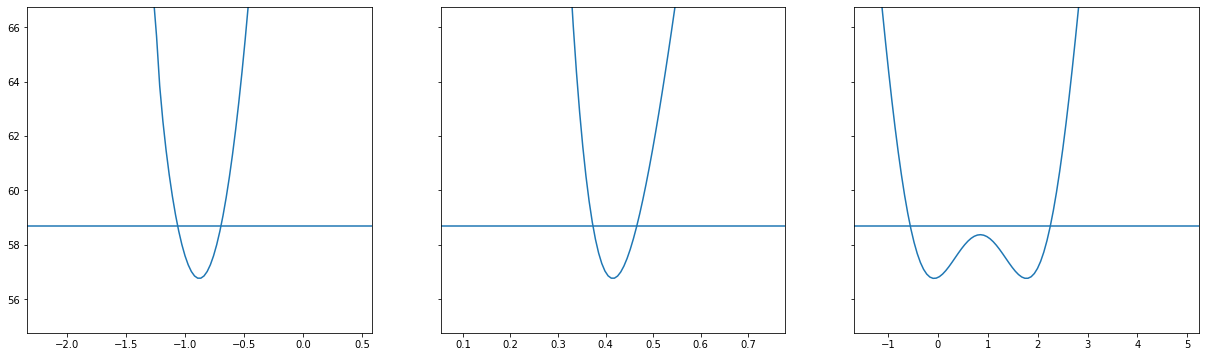

eta:  -0.6047199349609738 , error:  0.07785079084502607 0.10120602809853388
sigma:  0.4172262448309336 , error:  0.033088190913555145 0.0463234672789772
grad:  1.3960558684396998 , error:  0.995820954811793 1.1184069846779665


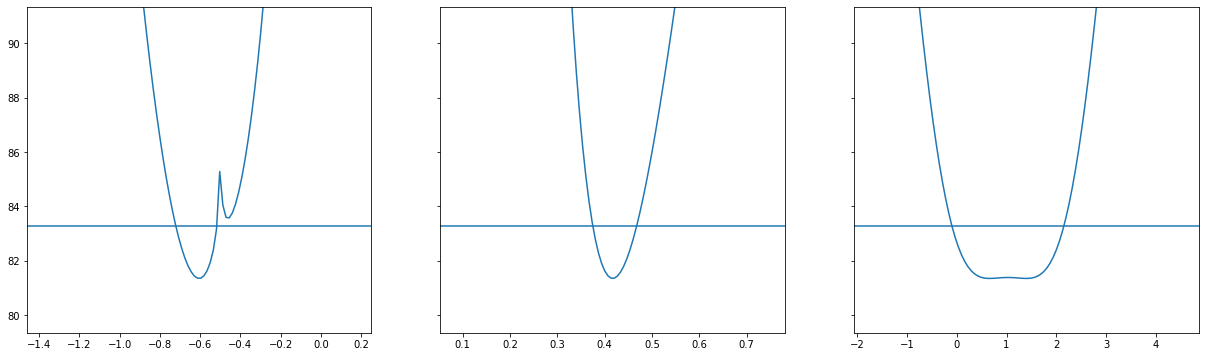

eta:  -0.4746916863628612 , error:  0.052510769804782566 0.12602584753147816
sigma:  0.42529420001591495 , error:  0.033728022599332476 0.04721923163906547
grad:  0.26096120394132494 , error:  0.5072705625265046 1.4576989912656642


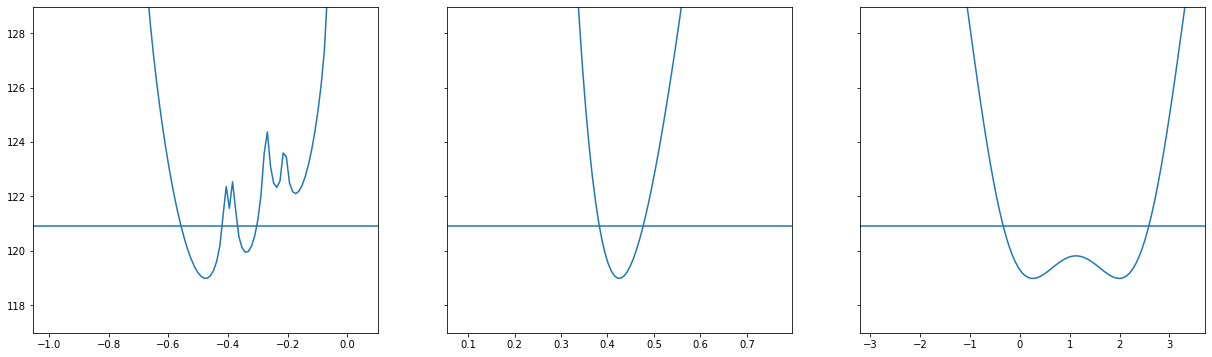

eta:  -0.8092111286364104 , error:  0.00011011043142852856 0.116
sigma:  0.4844322590298275 , error:  0.03841797846088501 0.05378516984523902
grad:  0.8474130581649325 , error:  2.284808400607059 1.049291946298991


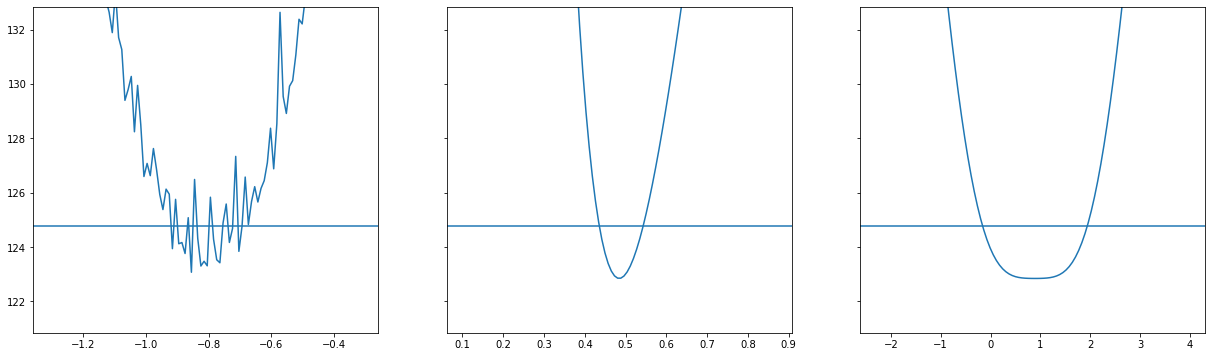

eta:  -0.2807704166943651 , error:  0.06865785810637397 0.0933746870246686
sigma:  0.39040083240829004 , error:  0.030960797287638935 0.04334511620269451
grad:  0.8637480764852347 , error:  0.9008262503391061 1.1749556524425826


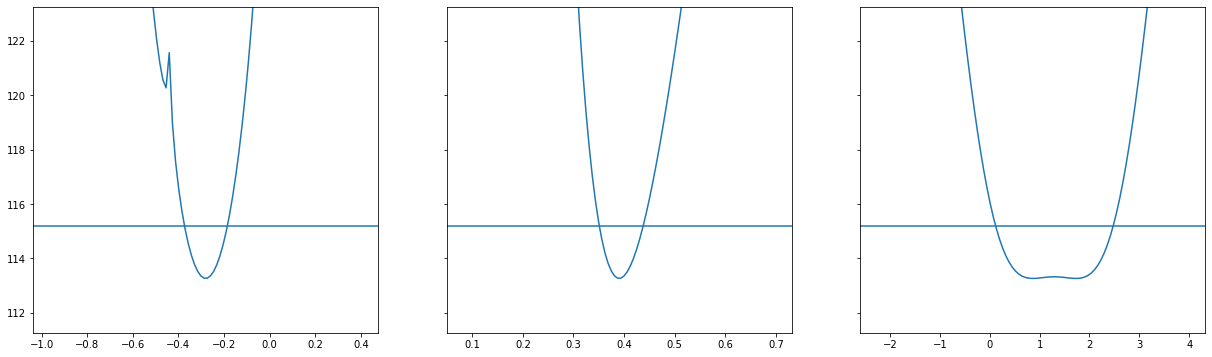

eta:  -0.2827687276305031 , error:  0.07803247025935725 0.1045635101475387
sigma:  0.42366489100435517 , error:  0.03359880734860412 0.04703833028804577
grad:  1.5388015837440117 , error:  1.7010498614378298 1.156106096521044


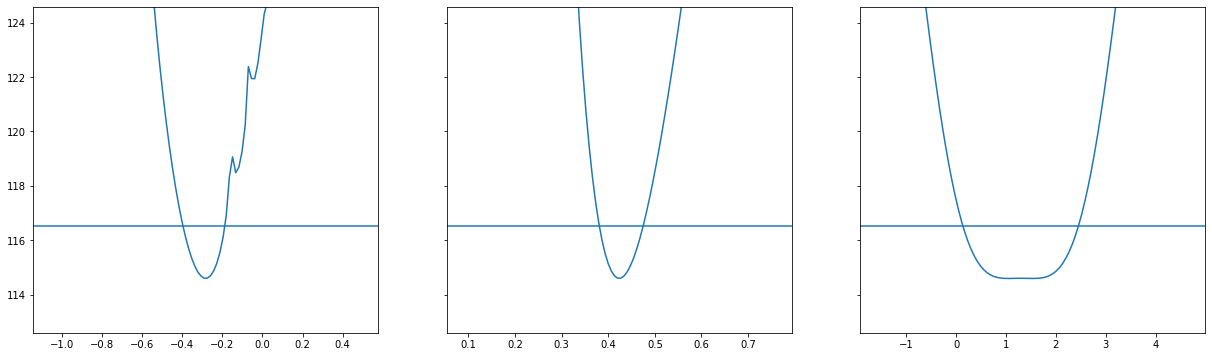

eta:  0.15841258863893987 , error:  0.03933843608833742 0.2132143235987888
sigma:  0.39663556526562566 , error:  0.031455244864801876 0.044037342810722635
grad:  0.5262722819828467 , error:  0.42270461682125404 1.7530087007031048


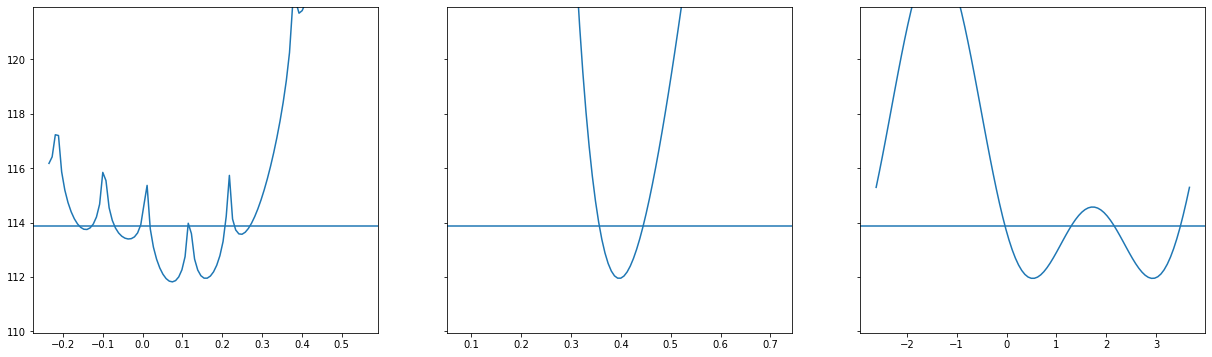

In [10]:
etas_map = [] 
etas_err_hess = [] 
etas_err_brute = []


for phi in phis: 
    
    eta, grad = MAP(phi)
    sigma = get_MAP_sigma(phi, eta, grad)
    errs_hess = 2*np.array(errors_hess(phi, eta, sigma, grad, diff=1e-4))
    widths = errs_hess*10
    widths[-1] = np.pi 
    if widths[0] < 0.1: # meaning that the bottom is probably not smooth
        widths[0] = 0.5
    errs_brute = errors_brute(phi, eta, sigma, grad, diff=widths)
    print('eta: ', eta, ', error: ', errs_hess[0], errs_brute[0])
    print('sigma: ', sigma, ', error: ', errs_hess[1], errs_brute[1])
    print('grad: ', grad, ', error: ', errs_hess[2], errs_brute[2])
    plot_cost(phi, eta, sigma, grad, widths=widths)
    
    etas_map.append(eta)
    etas_err_hess.append(errs_hess[0])
    etas_err_brute.append(errs_brute[0]) 

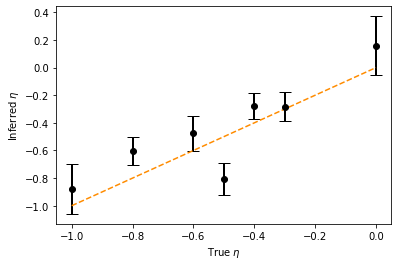

In [11]:
plt.errorbar(etas, etas_map, etas_err_brute, fmt='o', linewidth=2, color='k', capsize=6)
plt.plot(etas, etas, '--', color='darkorange')
plt.xlabel(r'True $\eta$')
plt.ylabel(r'Inferred $\eta$')
# plt.ylim([0, 0.7])
# plt.xlim([0, 0.51])
plt.show()
